In [144]:
import pandas as pd

def read_hist_raw(name = 'BTC', timeframe = '1h'):
    file_path = f"./data/{name}_USDT-{timeframe}.json"
    df = pd.read_json(file_path)

    # set column names
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

    # convert unix timestamp to datetime
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    
    return df



## Data Exploration

In [145]:
df = read_hist_raw(name = 'BTC', timeframe = '1h') # read data
# df = read_hist_raw(name = 'BTC', timeframe = '5m') # read data
print(df.head(10))
print(df.tail(10)) 

             datetime      open      high       low     close       volume
0 2021-01-01 00:00:00  28923.63  29031.34  28690.17  28995.13  2311.811445
1 2021-01-01 01:00:00  28995.13  29470.00  28960.35  29409.99  5403.068471
2 2021-01-01 02:00:00  29410.00  29465.26  29120.03  29194.65  2384.231560
3 2021-01-01 03:00:00  29195.25  29367.00  29150.02  29278.40  1461.345077
4 2021-01-01 04:00:00  29278.41  29395.00  29029.40  29220.31  2038.046803
5 2021-01-01 05:00:00  29220.31  29235.28  29084.11  29187.01  1469.956262
6 2021-01-01 06:00:00  29187.01  29270.00  29077.32  29174.35  1420.726291
7 2021-01-01 07:00:00  29174.35  29191.98  28806.54  29092.83  2380.180918
8 2021-01-01 08:00:00  29092.84  29178.03  28872.24  29000.01  2008.165739
9 2021-01-01 09:00:00  29000.01  29307.73  28970.00  29202.21  2022.056022
                 datetime      open      high       low     close      volume
23121 2023-08-22 23:00:00  25808.00  26070.04  25784.69  26056.00  2291.04723
23122 2023-08-23 00

##### Summary Statistics:

In [146]:
print(df.describe())

                            datetime          open          high  \
count                          23131  23131.000000  23131.000000   
mean   2022-04-28 07:58:34.867493632  34997.550070  35179.056338   
min              2021-01-01 00:00:00  15648.230000  15769.990000   
25%              2021-08-30 09:30:00  23325.795000  23414.345000   
50%              2022-04-28 10:00:00  31778.570000  31995.000000   
75%              2022-12-25 08:30:00  45002.485000  45286.315000   
max              2023-08-23 08:00:00  68635.120000  69000.000000   
std                              NaN  13129.873926  13213.779842   

                low         close         volume  
count  23131.000000  23131.000000   23131.000000  
mean   34806.123883  34997.426010    4802.208618  
min    15476.000000  15649.520000       0.000000  
25%    23235.640000  23326.565000    1406.233285  
50%    31563.520000  31777.730000    2697.090110  
75%    44672.505000  45002.485000    5966.309079  
max    68451.190000  68633.690

##### Time Series Plot:

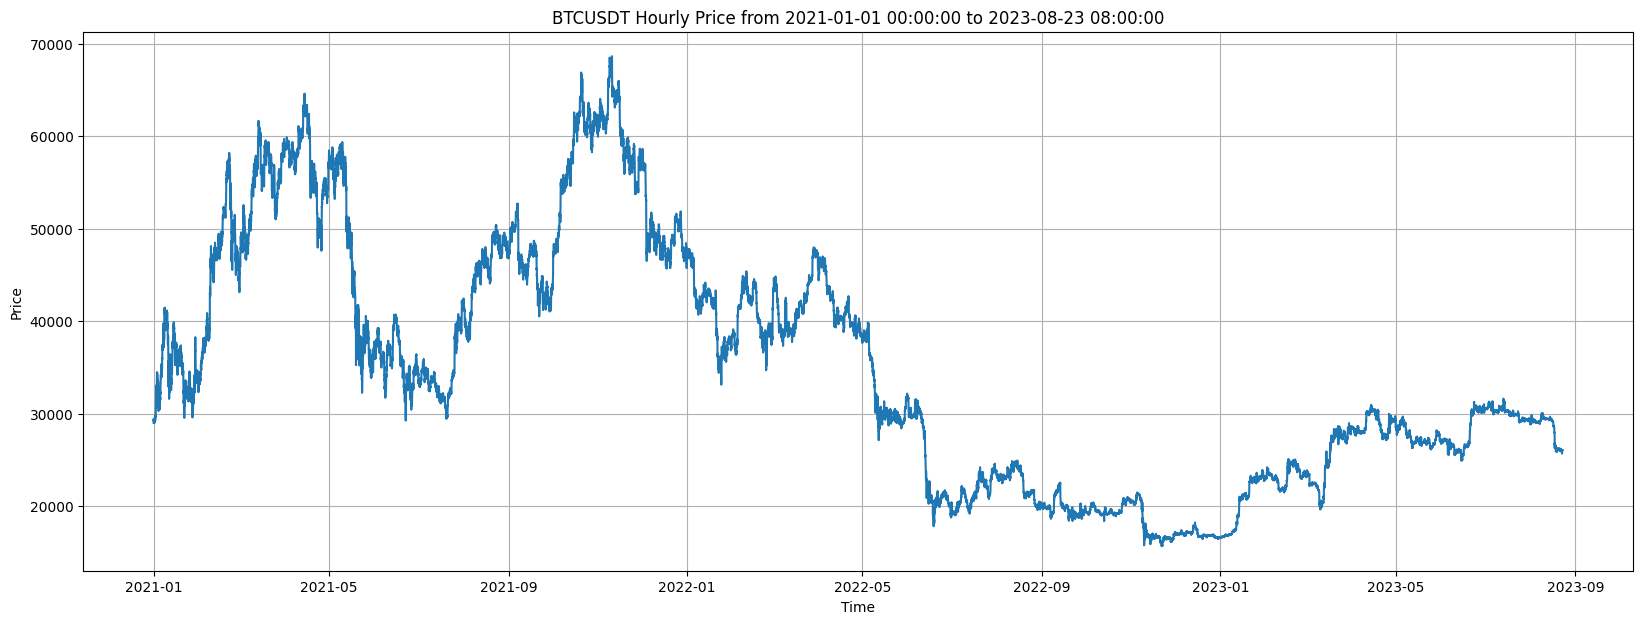

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.plot(df['datetime'], df['close'])
plt.title(f'BTCUSDT Hourly Price from {df["datetime"].iloc[0]} to {df["datetime"].iloc[-1]}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


##### Distribution of Price:

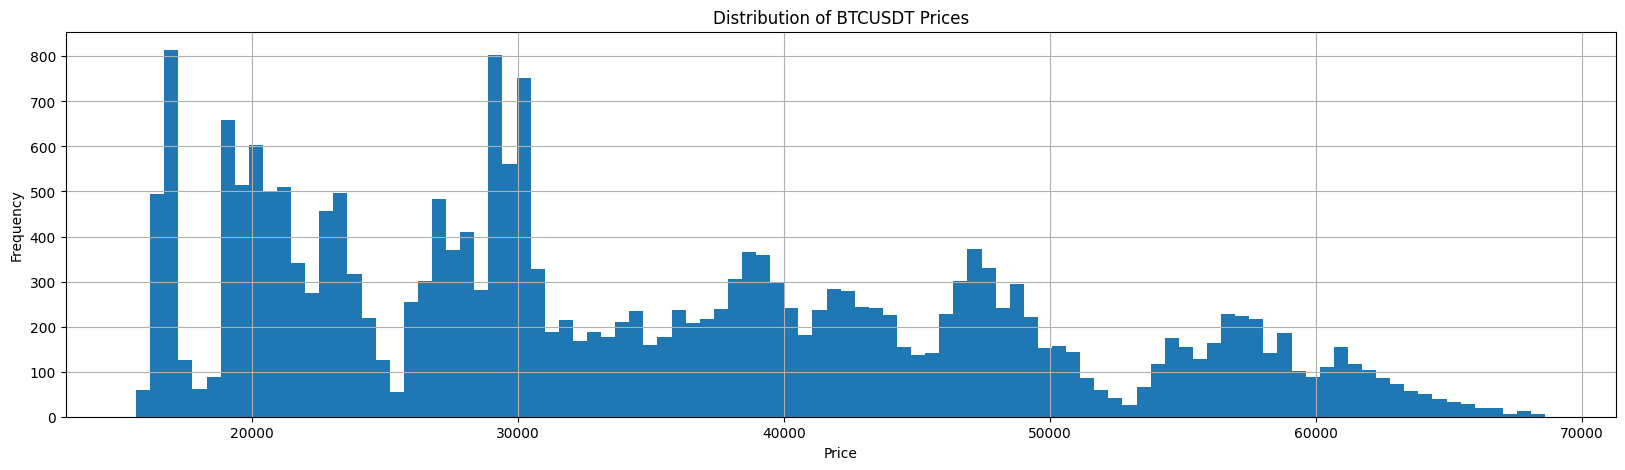

In [148]:
plt.figure(figsize=(20,5))
df['close'].hist(bins=100)
plt.title('Distribution of BTCUSDT Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


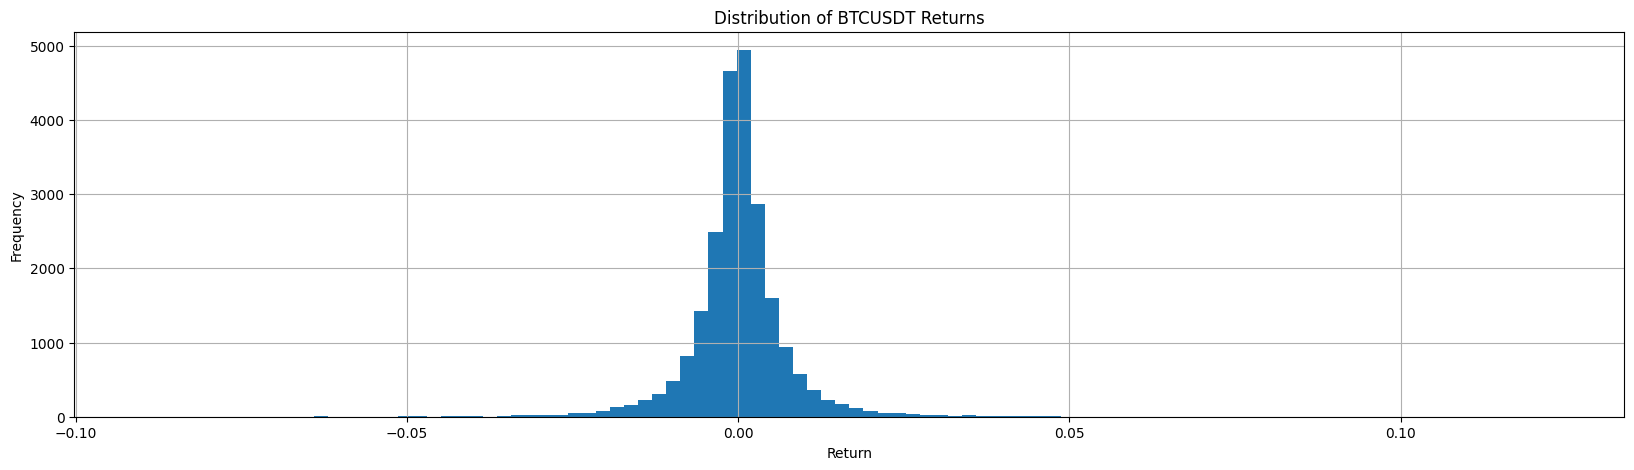

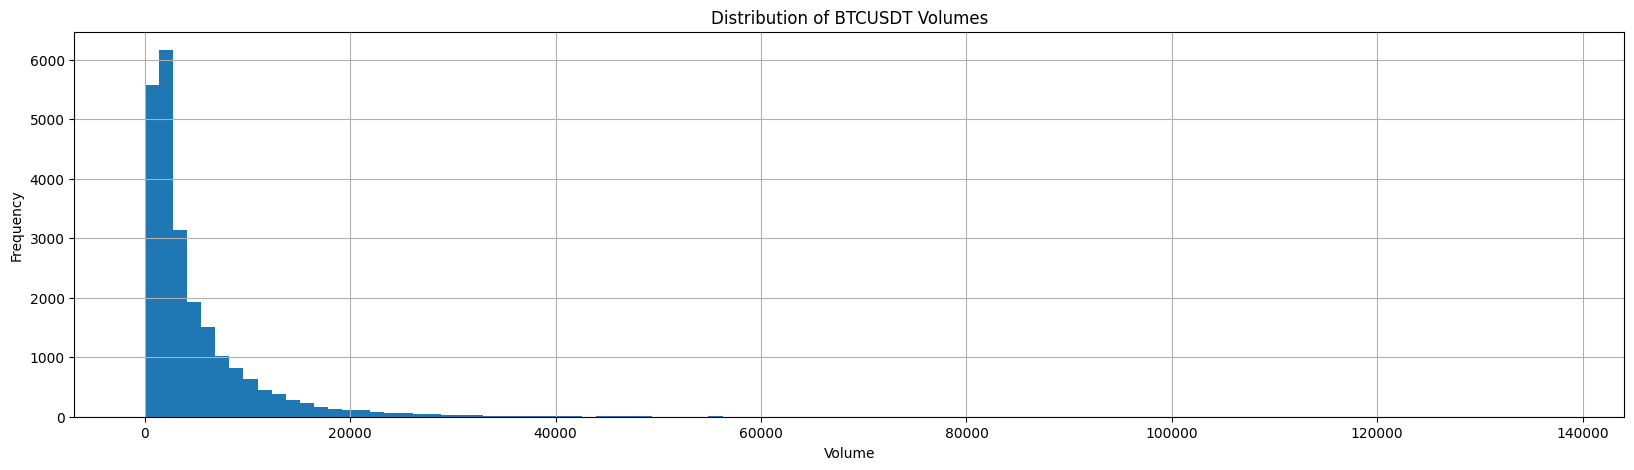

In [149]:
# distribution of returns
plt.figure(figsize=(20,5))
df['close'].pct_change().hist(bins=100)
plt.title('Distribution of BTCUSDT Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# distribution of volumes
plt.figure(figsize=(20,5))
df['volume'].hist(bins=100)
plt.title('Distribution of BTCUSDT Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### Boxplot:
Identify outliers

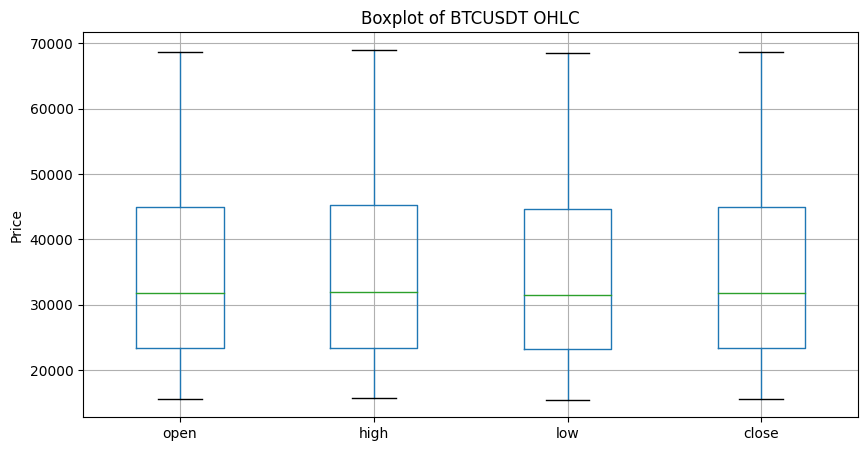

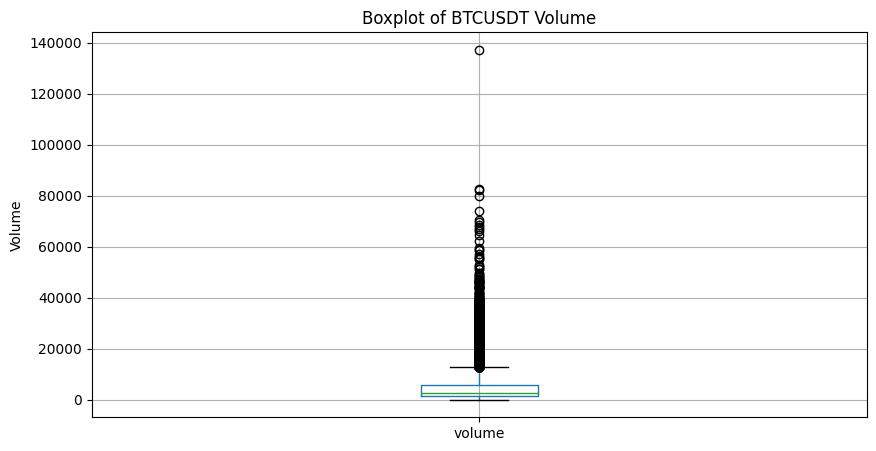

In [150]:
# boxplot open high low close
plt.figure(figsize=(10,5))
df[['open', 'high', 'low', 'close']].boxplot()
plt.title('Boxplot of BTCUSDT OHLC')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# boxplot volume
plt.figure(figsize=(10,5))
df[['volume']].boxplot()
plt.title('Boxplot of BTCUSDT Volume')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


We can clearly see that there are some outliers in volume data. 
- The volume should be greater than 0
- The volume's mean is only around 5,000 BTC, but there are some hours that the volume is greater than 100,000 BTC.

We will identify and remove them in the next step.

lower_bound: 0.00 - upper_bound: 28766.69 
Outliers count = 216 ( 0.93 %)
==== Outliers removed ====
                            datetime          open          high  \
count                          22915  22915.000000  22915.000000   
mean   2022-04-26 04:37:59.869081600  35117.336473  35297.705123   
min              2021-01-01 00:00:00  15648.230000  15769.990000   
25%              2021-08-28 09:30:00  23415.510000  23483.855000   
50%              2022-04-24 06:00:00  32099.970000  32345.000000   
75%              2022-12-22 12:30:00  45197.645000  45485.530000   
max              2023-08-23 08:00:00  68635.120000  69000.000000   
std                              NaN  13125.131469  13210.580569   

                low         close        volume  
count  22915.000000  22915.000000  22915.000000  
mean   34928.163154  35117.620848   4477.749672  
min    15476.000000  15649.520000      5.887034  
25%    23341.975000  23414.470000   1398.628235  
50%    31800.000000  32099.980000   

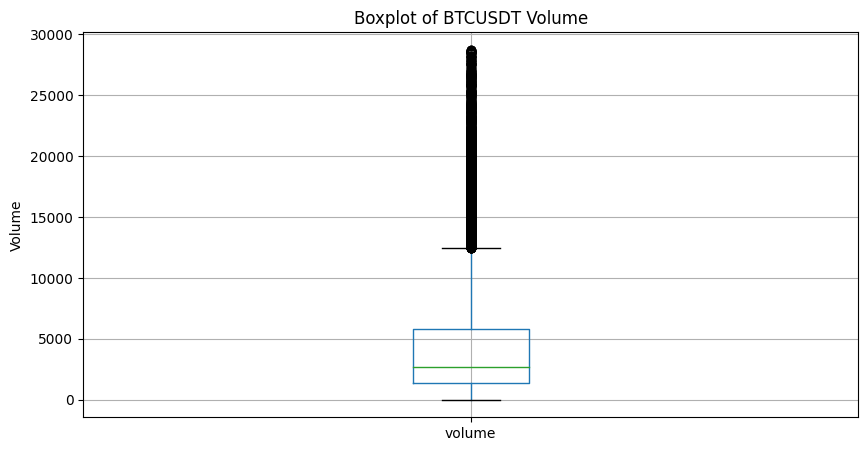

In [151]:
import pandas as pd

# Load your BTCUSDT data into a DataFrame (replace this with your actual data loading code)
# For the purpose of illustration, let's assume you have a DataFrame named 'data' with a 'volume' column.
# data = ...

# Calculate the first quartile (25th percentile) and third quartile (75th percentile)
q1 = df['volume'].quantile(0.25)
q3 = df['volume'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# # Define lower and upper bounds for outliers
iqr_threshold = 5
lower_bound = q1 - iqr_threshold * iqr
upper_bound = q3 + iqr_threshold * iqr

lower_bound = 0 if lower_bound < 0 else lower_bound

print(f"lower_bound: {lower_bound:.2f} - upper_bound: {upper_bound:.2f} ")

# Find outliers
outliers = df[(df['volume'] <= lower_bound) | (df['volume'] >= upper_bound)]

# Count the outliers
df_count = len(df)
outliers_count = len(outliers)
print(f"Outliers count = {outliers_count} ( {outliers_count / df_count * 100 :.2f} %)")  # {roc_value:.2f}

# remove outliers from df
df = df[(df['volume'] > lower_bound) & (df['volume'] < upper_bound)]

print("==== Outliers removed ====")
print(df.describe())

# boxplot volume

plt.figure(figsize=(10,5))
df[['volume']].boxplot()
plt.title('Boxplot of BTCUSDT Volume')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


For this experiment
- We want to keep data as munch as possible, so we limit the number of outliers to 1% of the total data.
- We can adjust iqr_threshold to change the number of outliers to remove.

Next step
- To implement outlier removal function in feature engineering notebook.

##### Decomposition

Decompose the time series into trend, seasonal, and residual components.

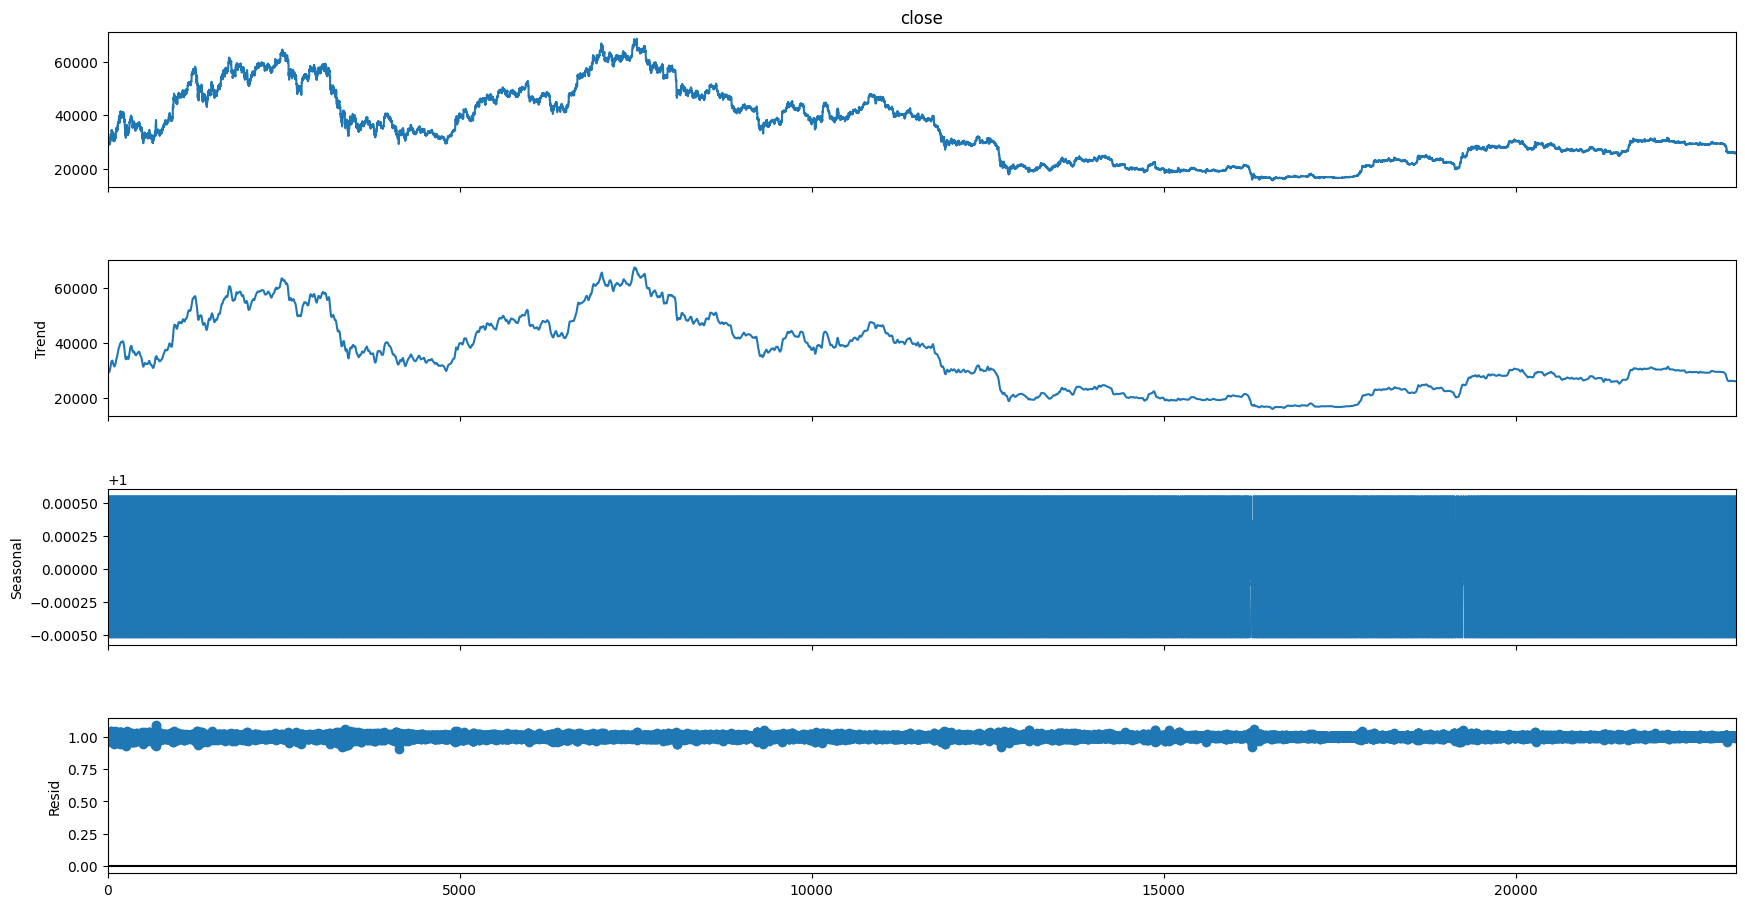

In [152]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['close'], model='multiplicative', period = 24)  # daily seasonality as data is hourly
plt = result.plot()
plt.set_size_inches(20, 10)
plt.show()
